In [1]:
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

I0000 00:00:1761579272.919946 1931108 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1761579272.947024 1931108 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761579273.559268 1931108 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=columns)
df = df.dropna()
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
# Split target and values
X = df.iloc[:, 0:4].values
y = df['species'].values

In [4]:
# change labels to numerical values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# make vector from categories
y_categorical = keras.utils.to_categorical(y_encoded)

# scale values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data set and ensure that test and train set have same amount of targets and also suffle data.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=y)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (120, 4)
Test data shape: (30, 4)
Training labels shape: (120, 3)
Test labels shape: (30, 3)


# Building the neural network


In [5]:
model = keras.Sequential([
    keras.Input(shape=(4,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0000 00:00:1761579274.984360 1931108 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1761579274.987308 1931108 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1761579275.103757 1931108 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13121 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


# Train the model
I noticed that i  batch size is raised over 8, models starts to perform poorly

In [6]:
model_data = model.fit(X_train, y_train, epochs=90, batch_size=8, validation_split=0.1)
score = model.evaluate(X_test, y_test, verbose=1)


Epoch 1/90


I0000 00:00:1761579275.840809 1931235 service.cc:158] XLA service 0x7e3c9802ffb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761579275.840844 1931235 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1761579275.849748 1931235 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761579275.890489 1931235 cuda_dnn.cc:463] Loaded cuDNN version 91002


 1/14 ━━━━━━━━━━━━━━━━━━━━ 8s 638ms/step - accuracy: 0.2500 - loss: 1.0517

I0000 00:00:1761579276.241987 1931235 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5556 - loss: 0.9332 - val_accuracy: 0.5833 - val_loss: 0.9653
Epoch 2/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6204 - loss: 0.8781 - val_accuracy: 0.5833 - val_loss: 0.9227
Epoch 3/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6574 - loss: 0.8312 - val_accuracy: 0.5833 - val_loss: 0.8869
Epoch 4/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6759 - loss: 0.7872 - val_accuracy: 0.5833 - val_loss: 0.8501
Epoch 5/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6759 - loss: 0.7486 - val_accuracy: 0.5833 - val_loss: 0.8152
Epoch 6/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6759 - loss: 0.7142 - val_accuracy: 0.5833 - val_loss: 0.7833
Epoch 7/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6944 - loss: 0.6805 - val_accuracy: 0.5833 - val_loss: 0.7477
Epoch 8/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6944 - loss: 0.6502 - val_accuracy: 0.6667 - val_loss: 0.7132
Ep

# Plot the results
 I noticed that 12 neurons and 90 epocs was an optimal to get over 95 % accuracy. If neurons are raised it won affect to results anymore. If epocs are decreased  model starts to perform poorly.

| Metric                  | Data used                                                             | What it tells you                                                                                           |
| ----------------------- | --------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **Training accuracy**   | The data the model was **trained on** (`X_train`, `y_train`)          | How well the model learned patterns **from known examples**                                                 |
| **Validation accuracy** | A held-out portion of the training data (your `validation_split=0.1`) | How well the model performs on **unseen data during training** (used to tune epochs and detect overfitting) |
| **Test accuracy**       | The completely **separate test set** (`X_test`, `y_test`)             | How well the model generalizes to **new, never-before-seen data**                                           |


In well trained model:
Training accuracy  ≥  Validation accuracy  ≈  Test accuracy

In this case validation accuracy is 1 because dataset size is so small and validation set is 0.1 from it. Thats why model performs so well on that.

Test loss: 0.17570391297340393
Test accuracy: 0.9333333373069763
Final training accuracy: 0.9629629850387573
Final validation accuracy: 1.0


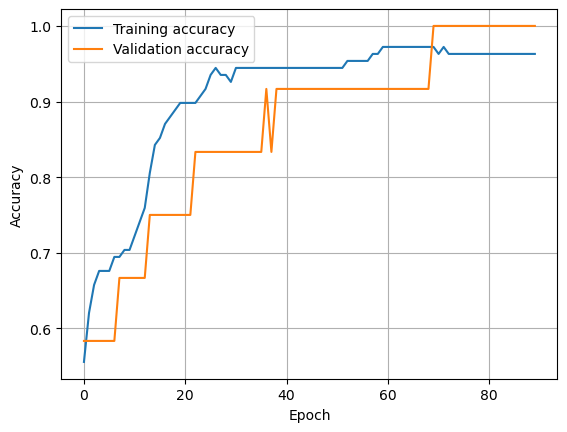

In [7]:

print("Test loss:", score[0])
print("Test accuracy:", score[1])

print("Final training accuracy:", model_data.history['accuracy'][-1])
print("Final validation accuracy:", model_data.history['val_accuracy'][-1])


plt.plot(model_data.history['accuracy'],label= 'Training accuracy')
plt.plot(model_data.history['val_accuracy'],label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
